## Libraries

In [8]:
import import_ipynb
import numpy as np
from matplotlib import pyplot as plt
import os
from time import perf_counter
from numpy.random import seed
import pandas as pd
import itertools

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras_preprocessing.image import ImageDataGenerator
from joblib import dump, load

In [9]:
# Classification and High Level Feature Generation
from keras import backend as K
from keras.models import Sequential,Model
from keras.layers import Input,Dense, Activation, Dropout
from keras import regularizers, optimizers
from keras.callbacks import EarlyStopping

In [10]:
import MEng_Final_Utils as utils

## Constants

In [32]:
seed(0)

In [33]:
base_path = os.getcwd()

In [36]:
images_path = os.path.join(base_path,'DATA_dr','Images_Balanced')
labels_path = os.path.join(base_path,'DATA_dr','Labels_Balanced.xlsx')

In [40]:
labels_names = ['Window', 'Board','Table','External_Door','Stair Door','Office', 'Pillar', 'Display Screen',
                   'ATM','Chairs','Bins','Internal Door','Elevator']

In [41]:
num_labels = len(labels_names)
resize_factor = 0.1
cell_size = 80*resize_factor

## Read Images

In [43]:
Images = utils.get_images(utils.get_files(images_path))

In [44]:
len(Images)

473

In [45]:
Images = np.asarray(Images)
#testing_images = np.asarray(testing_images)
len(Images)

473

In [46]:
filenames = []
for i in range(0,len(Images)):
    filename = str(i+1)+'.jpg'
    filenames.append(filename)
    
filenames = np.asarray(filenames)

## Read Labels

In [49]:
Labels = utils.read_labels(labels_path,labels_names)[:len(Images),:]
Labels.shape

(473, 13)

In [51]:
images_df = pd.read_excel(labels_path, names=labels_names)
images_df.insert(0,'Filenames', filenames)
images_df

,Filenames,Window,Board,Table,External_Door,Stair Door,Office,Pillar,Display Screen,ATM,Chairs,Bins,Internal Door,Elevator
0,1.jpg,0,0,0,1,1,0,0,0,0,0,0,0,0
1,2.jpg,1,1,0,0,1,1,1,0,0,1,1,0,0
2,3.jpg,1,0,1,1,1,0,1,0,0,0,0,0,0
3,4.jpg,0,0,0,1,1,1,0,0,0,0,0,1,0
4,5.jpg,0,1,0,0,0,1,0,1,0,0,0,0,0
5,6.jpg,0,0,0,0,1,1,1,1,1,1,0,0,0
6,7.jpg,1,0,1,0,0,0,0,0,0,0,0,0,0
7,8.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1
8,9.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1
9,10.jpg,1,1,0,0,0,1,1,0,1,1,1,0,0


In [53]:
train_df, test_df = train_test_split(images_df, random_state=0, test_size = 0.2)

In [56]:
train_df

,Filenames,Window,Board,Table,External_Door,Stair Door,Office,Pillar,Display Screen,ATM,Chairs,Bins,Internal Door,Elevator
113,114.jpg,1,1,0,1,0,0,1,0,0,0,0,0,0
385,386.jpg,0,0,0,0,0,0,0,0,0,0,0,0,1
55,56.jpg,0,0,0,0,1,1,1,1,1,1,1,0,0
375,376.jpg,0,0,0,0,0,0,0,0,0,0,0,0,1
141,142.jpg,1,0,0,0,0,0,0,0,0,0,0,0,0
118,119.jpg,0,0,0,1,1,0,0,0,0,0,0,0,0
331,332.jpg,0,0,0,0,0,0,0,0,0,0,1,0,0
107,108.jpg,0,0,0,0,1,1,1,1,1,1,0,0,0
252,253.jpg,0,0,0,0,0,0,0,1,0,0,0,0,0
198,199.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0


In [58]:
test_df

,Filenames,Window,Board,Table,External_Door,Stair Door,Office,Pillar,Display Screen,ATM,Chairs,Bins,Internal Door,Elevator
102,103.jpg,0,0,0,0,0,1,0,0,0,1,1,0,0
76,77.jpg,1,1,0,0,0,1,1,0,1,1,1,0,0
21,22.jpg,0,0,0,1,1,0,0,0,0,0,0,0,0
336,337.jpg,0,0,0,0,0,0,0,0,0,0,1,0,0
186,187.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0
303,304.jpg,0,0,0,0,0,0,0,0,1,0,0,0,0
134,135.jpg,1,0,0,0,0,0,0,0,0,0,0,0,0
438,439.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0
157,158.jpg,1,1,0,0,0,0,0,0,0,0,0,0,0
90,91.jpg,1,1,0,0,1,1,1,0,1,1,1,0,0


In [59]:
test_image_names = []
for name in test_df['Filenames']:
    test_image_names.append(name)

## Augment Data

In [66]:
datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=10,
    height_shift_range=10,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255,
    data_format='channels_last',
    validation_split=0.10)

In [67]:
datagen_test = ImageDataGenerator(rescale=1./255)

In [68]:
train_datagen = datagen.flow_from_dataframe(train_df,
                        directory=images_path,
                        x_col='Filenames',
                        y_col=labels_names,
                        target_size=(48,64),
                        color_mode='rgb',
                        class_mode='other',
                        batch_size=1000,
                        shuffle=True,
                        seed=0,
                        drop_duplicates=True,
                        subset='training')

Found 341 images.


In [70]:
val_datagen = datagen.flow_from_dataframe(train_df,
                        directory=images_path,
                        x_col='Filenames',
                        y_col=labels_names,
                        target_size=(48,64),
                        color_mode='rgb',
                        class_mode='other',
                        batch_size=1000,
                        shuffle=True,
                        seed=0,
                        drop_duplicates=True,
                        subset='validation')

Found 37 images.


In [71]:
test_datagen = datagen_test.flow_from_dataframe(test_df,
                        directory=images_path,
                        x_col='Filenames',
                        y_col=labels_names,
                        target_size=(48,64),
                        color_mode='rgb',
                        class_mode='other',
                        batch_size=1000,
                        shuffle=False,
                        seed=0)

Found 95 images.


In [72]:
train_augmented_data = []
for image,label in zip(train_datagen,range(25)):
    train_augmented_data.append(image)

In [73]:
val_augmented_data = []
for image,label in zip(val_datagen,range(1)):
    val_augmented_data.append(image)

In [35]:
test_augmented_data = []
for image,label in zip(test_datagen,range(1)):
    test_augmented_data.append(image)

In [75]:
training_images, train_labels = utils.get_augmented_images_and_labels(train_augmented_data)
validation_images, val_labels = utils.get_augmented_images_and_labels(val_augmented_data)
testing_images, test_labels = utils.get_augmented_images_and_labels(test_augmented_data)

##  HOG Features

In [49]:
training_hog_features = utils.get_hog_features(training_images,cell_size)

In [51]:
validation_hog_features = utils.get_hog_features(validation_images,cell_size)

##  LBP Features

In [52]:
training_lbp_features = utils.get_lbp_features(training_images,cell_size,neighbours=8, radius=1)

In [53]:
validation_lbp_features = utils.get_lbp_features(validation_images,cell_size,neighbours=8, radius=1))

## BoW Features

In [1]:
train_bow_data = []
for image,label in zip(train_datagen,range(1)):
    train_bow_data.append(image)
    
training_bow_ims = utils.get_augmented_images_and_labels(train_bow_data)[0]

In [2]:
k = 200
training_bow = utils.generate_bow1(training_bow_ims)
kmeans = KMeans(n_clusters=k, n_init=1, max_iter=100, random_state=0, verbose=0)
kmeans.fit(training_bow)
dump(kmeans,'KMeans_Balanced.joblib')

In [56]:
# k=200
# kmeans = load('KMeans_Balanced.joblib')

In [57]:
training_bow_features = utils.get_bow_features(training_images,k,kmeans)

In [59]:
validation_bow_features = utils.get_bow_features(validation_images,k,kmeans)

## High Level Feature Generation

### 1. HOG

In [60]:
early_ae_hog = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

In [61]:
training_features = training_hog_features
validation_features = validation_hog_features
input_size = training_features.shape[1]

In [76]:
autoencoder_hog, encoder_hog = utils.define_autoencoder_model(input_size,300,
                                                              hidden_activation='sigmoid',
                                                              output_activation='sigmoid')

history_ae_hog = utils.autoencoder_compile_and_fit(autoencoder_hog, training_features, num_epochs=1000, lr=0.001, batch_size=100,
                                                  validation_data=(validation_features,validation_features),
                                                  callbacks=[early_ae_hog])

In [79]:
print(autoencoder_hog.evaluate(training_features,training_features))
print(autoencoder_hog.evaluate(validation_features,validation_features))

In [64]:
high_level_train_hog = utils.generate_high_level_features(encoder_hog,training_features)
high_level_val_hog = utils.generate_high_level_features(encoder_hog,validation_features)

### 2. LBP

In [80]:
early_ae_lbp = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

In [68]:
training_features = training_lbp_features
validation_features = validation_lbp_features
input_size = training_features.shape[1]

In [81]:
autoencoder_lbp, encoder_lbp = utils.define_autoencoder_model(input_size, 300,
                                                              hidden_activation='sigmoid',
                                                              output_activation='sigmoid')

history_ae_lbp = utils.autoencoder_compile_and_fit(autoencoder_lbp, training_features, num_epochs=1000, lr=0.001,
                                                   batch_size=100, validation_data=(validation_features,validation_features),
                                                  callbacks=[early_ae_lbp])

In [82]:
print(autoencoder_lbp.evaluate(training_features,training_features))
print(autoencoder_lbp.evaluate(validation_features,validation_features))

In [71]:
high_level_train_lbp = utils.generate_high_level_features(encoder_lbp,training_features)
high_level_val_lbp = utils.generate_high_level_features(encoder_lbp,validation_features)

### 3. BOW-RGB

In [83]:
early_ae_bow = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

In [85]:
training_features = training_bow_features
validation_features = validation_bow_features
input_size = training_features.shape[1]

In [86]:
autoencoder_bow, encoder_bow = utils.define_autoencoder_model(input_size,300, 
                                                             hidden_activation='sigmoid',
                                                             output_activation='sigmoid')

history_ae_bow = utils.autoencoder_compile_and_fit(autoencoder_bow, training_features, lr=0.001, num_epochs=1000,
                                                   batch_size=100, validation_data=(validation_features,validation_features),
                                                  callbacks=[early_ae_bow])

In [87]:
print(autoencoder_bow.evaluate(training_features,training_features))
print(autoencoder_bow.evaluate(validation_features,validation_features))

In [88]:
high_level_train_bow = utils.generate_high_level_features(encoder_bow,training_features)
high_level_val_bow = utils.generate_high_level_features(encoder_bow,validation_features)

## LR Classifier Models

### 1. HOG

In [89]:
early_lrl_hog = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [80]:
training_features = high_level_train_hog
validation_features = high_level_val_hog
input_size = training_features.shape[1]

In [90]:
model_hog = utils.define_LRL_model(input_size, num_labels)

history_lrl_hog = utils.compile_and_fit(model_hog, training_features, train_labels, num_epochs=200, lr=0.001,
                                            batch_size=30, validation_data=(validation_features,val_labels),
                                           callbacks=[early_lrl_hog])

In [89]:
model_hog.evaluate(training_features,train_labels)
model_hog.evaluate(validation_features,val_labels)

In [94]:
predicted_values_hog = utils.predict_and_threshold(model_hog, validation_features, val_labels)

### 10.2. LBP

In [91]:
early_lrl_lbp = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [491]:
training_features = high_level_train_lbp
validation_features = high_level_val_lbp
input_size = training_features.shape[1]

In [92]:
model_lbp = utils.define_LRL_model(input_size, num_labels)

history_lrl_lbp = utils.compile_and_fit(model_lbp, training_features, train_labels,
                                        lr=0.001, num_epochs=200, batch_size=30,
                                        validation_data=(validation_features,val_labels),
                                        callbacks=[early_lrl_lbp])

In [93]:
model_lbp.evaluate(training_features,train_labels)
model_lbp.evaluate(validation_features,val_labels)

In [95]:
predicted_values_lbp = utils.predict_and_threshold(model_lbp, validation_features, val_labels)

### 10.3. BOW-RGB

In [96]:
early_lrl_bow = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [97]:
training_features = high_level_train_bow
validation_features = high_level_val_bow
input_size = training_features.shape[1]

In [98]:
model_bow = utils.define_LRL_model(input_size,num_labels)

history_lrl_bow = utils.compile_and_fit(model_bow, training_features, train_labels,
                                        lr=0.001, num_epochs=200, batch_size=30,
                                        validation_data=(validation_features,val_labels),
                                        callbacks=[early_lrl_bow])

In [99]:
model_bow.evaluate(training_features,train_labels)
model_bow.evaluate(validation_features,val_labels)

In [100]:
predicted_values_bow = utils.predict_and_threshold(model_bow, validation_features, val_labels)

# Model-LR Pipeline

In [101]:
t1 = perf_counter()

testing_hog_features = utils.get_hog_features(testing_images,cell_size)
testing_lbp_features = utils.get_lbp_features(testing_images,cell_size)
testing_bow_features = utils.get_bow_features(testing_images,k,kmeans)

high_level_test_hog = encoder_hog.predict(testing_hog_features)
high_level_test_lbp = encoder_lbp.predict(testing_lbp_features)
high_level_test_bow = encoder_bow.predict(testing_bow_features)

predicted_values_hog = model_hog.predict(high_level_test_hog)
predicted_values_lbp = model_lbp.predict(high_level_test_lbp)
predicted_values_bow = model_bow.predict(high_level_test_bow)

predicted_values_final = (predicted_values_hog + predicted_values_lbp + predicted_values_bow)/3

t2 = perf_counter()

In [572]:
runtime = (t2-t1)/len(testing_images)

In [102]:
utils.threshold_curve(test_labels,predicted_values_final)
utils.threshold_curve1(test_labels,predicted_values_final)

In [103]:
predicted_labels = utils.threshold_labels(predicted_values_final,0.25)
print('   TPR       TNR       Avg.')
print(utils.model_evaluation(test_labels,predicted_labels)[0])

In [104]:
print('Runtime : '+str(runtime)+' secs/image')

## RF and KNN

In [105]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [109]:
def custom_scorer_func(estimator, validation_data, validation_labels):
    
    validation_data=validation_data
    validation_labels=validation_labels
    predicted_probs = estimator.predict_proba(validation_data)
    predicted_values = []
    for arr in predicted_probs:
        prob = arr[:,1]
        predicted_values.append(prob)
    
    predicted_values = (np.asarray(predicted_values)).transpose()
    
    curve_values = []
    thresholds = np.linspace(0,1.1,num=11,endpoint=False)
    for threshold in thresholds:
        labels = utils.threshold_labels(predicted_values,threshold)
        values = utils.model_evaluation(validation_labels,labels)[0]
        curve_values.append(values)
        
    curve_values = np.asarray(curve_values)
    max_average = np.max(curve_values[:,3])
    return max_average

### 1. Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
def rf_clf(n,m, train_data, train_labels, test_data, test_labels, show=0):
    
    clf_rf = RandomForestClassifier(n_estimators=n, max_features=m)
    clf_rf.fit(train_data,train_labels)
    
    predicted_values_rf = utils.get_probability_values(clf_rf, test_data)
    max_average = utils.max_avg(test_labels, predicted_values_rf)
    if show == 1:
        utils.threshold_curve(test_labels,predicted_values_rf)
        utils.threshold_curve1(test_labels,predicted_values_rf)
    
    return max_average, clf_rf

### Grid Search : RF-HOG

In [107]:
validation_data = high_level_val_hog
validation_labels = val_labels

parameters = {'n_estimators':[10,50,100,300,500],
              'max_features':[10,20,30,50,100,200,300]}

clf_rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=clf_rf, param_grid=parameters, cv=[(slice(None), slice(None))],
                           n_jobs=1, verbose=1, scoring=custom_scorer_func)

grid_search.fit(high_level_train_hog, train_labels)

In [110]:
print(grid_search.best_score_)
print(grid_search.best_params_)

### Grid Search : RF-LBP

In [111]:
validation_data = high_level_val_lbp
validation_labels = val_labels

parameters_lbp = {'n_estimators':[10,50,100,300,500],
              'max_features':[10,20,30,50,100,200,300]}

clf_rf_lbp = RandomForestClassifier()
grid_search_lbp = GridSearchCV(estimator=clf_rf_lbp, param_grid=parameters_lbp, cv=[(slice(None), slice(None))],
                               n_jobs=1, verbose=2, scoring=custom_scorer_func)

grid_search_lbp.fit(high_level_train_lbp, train_labels)

In [112]:
print(grid_search_lbp.best_score_)
print(grid_search_lbp.best_params_)

### Grid Search : RF-BoW

In [113]:
validation_data = high_level_val_lbp
validation_labels = val_labels

parameters_bow = {'n_estimators':[10,50,100,300,500],
              'max_features':[10,20,30,50,100,200,300]}

clf_rf_bow = RandomForestClassifier()
grid_search_bow = GridSearchCV(estimator=clf_rf_bow, param_grid=parameters_bow, cv=[(slice(None), slice(None))],
                               n_jobs=1, verbose=2, scoring=custom_scorer_func)

grid_search_bow.fit(high_level_train_bow, train_labels)

In [114]:
print(grid_search_bow.best_score_)
print(grid_search_bow.best_params_)

### Training with best params

In [116]:
clf_rf_hog = rf_clf(500,30, high_level_train_hog, train_labels, high_level_val_hog, val_labels, show=0)[1]

clf_rf_lbp = rf_clf(100,30, high_level_train_lbp, train_labels, high_level_val_lbp, val_labels, show=0)[1]

clf_rf_bow = rf_clf(100,50, high_level_train_bow, train_labels, high_level_val_bow, val_labels, show=0)[1]

# Model-RF Pipeline

In [117]:
t1_rf = perf_counter()

testing_hog_features = utils.get_hog_features(testing_images,cell_size)
testing_lbp_features = utils.get_lbp_features(testing_images,cell_size)
testing_bow_features = utils.get_bow_features(testing_images,k,kmeans)

high_level_test_hog = encoder_hog.predict(testing_hog_features)
high_level_test_lbp = encoder_lbp.predict(testing_lbp_features)
high_level_test_bow = encoder_bow.predict(testing_bow_features)

hog_values = utils.get_probability_values(clf_rf_hog, high_level_test_hog)
lbp_values = utils.get_probability_values(clf_rf_lbp, high_level_test_lbp)
bow_values = utils.get_probability_values(clf_rf_bow, high_level_test_bow)

predicted_values_rf = (hog_values + lbp_values + bow_values)/3

t2_rf = perf_counter()

MEng_Final_Utils.ipynb:25: RuntimeWarning: invalid value encountered in double_scalars
  "\n",


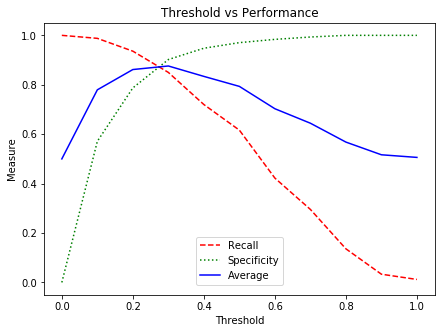

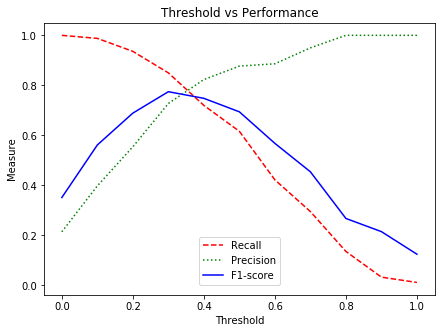

In [57]:
runtime_rf = (t2_rf - t1_rf)/len(testing_images)
utils.threshold_curve(test_labels, predicted_values_rf)
utils.threshold_curve1(test_labels, predicted_values_rf)

In [118]:
predicted_labels_rf = utils.threshold_labels(predicted_values_rf,0.28)
print(utils.model_evaluation(test_labels,predicted_labels_rf)[0])

In [119]:
print('Runtime : '+str(runtime_rf)+' secs/image')

### PR Curve and ROC Curve

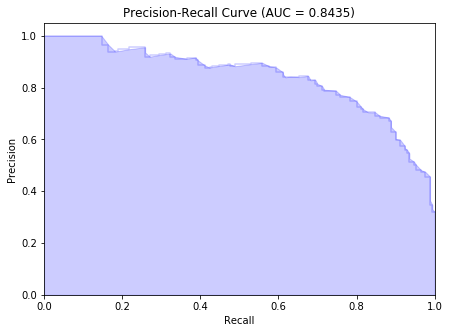

0.8435487115860058

In [84]:
utils.get_precision_recall_curve(predicted_values_rf, test_labels, avg_type='macro')

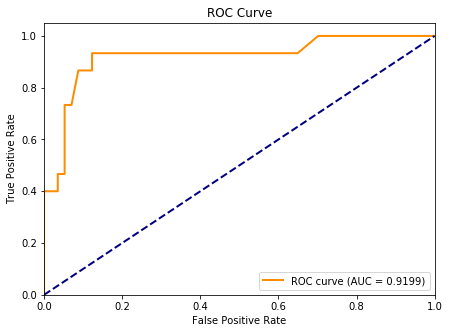

In [85]:
utils.get_roc_curve(predicted_values_rf, test_labels, avg_type='macro')

### 2. KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
def knn_clf(k, weights, train_data, train_labels, test_data, test_labels, show=0):
    
    clf_knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
    clf_knn.fit(train_data,train_labels)
    
    predicted_values_knn = utils.get_probability_values(clf_knn, test_data)
    max_average = utils.max_avg(test_labels, predicted_values_knn)
    if show == 1:
        utils.threshold_curve(test_labels,predicted_values_knn)
        utils.threshold_curve1(test_labels,predicted_values_knn)
    
    return max_average, clf_knn, predicted_values_knn

### Grid Search: KNN-HOG

In [124]:
parameters_knn = {'n_neighbors':list(np.arange(1,30)),
                 'weights':['uniform','distance']}

validation_data = high_level_val_hog
validation_labels = val_labels

clf_knn_hog = KNeighborsClassifier()
grid_search_knn_hog = GridSearchCV(estimator=clf_knn_hog, param_grid=parameters_knn, cv=[(slice(None), slice(None))],
                                   n_jobs=1, verbose=1, scoring=custom_scorer_func)

grid_search_knn_hog.fit(high_level_train_hog, train_labels)

print(grid_search_knn_hog.best_score_)
print(grid_search_knn_hog.best_params_)

### Grid Search: KNN-LBP

In [125]:
validation_data = high_level_val_lbp
validation_labels = val_labels

clf_knn_lbp = KNeighborsClassifier()
grid_search_knn_lbp = GridSearchCV(estimator=clf_knn_lbp, param_grid=parameters_knn,
                                   cv=[(slice(None), slice(None))], n_jobs=1, verbose=0, scoring=custom_scorer_func)

grid_search_knn_lbp.fit(high_level_train_lbp, train_labels)

print(grid_search_knn_lbp.best_score_)
print(grid_search_knn_lbp.best_params_)

### Grid Search: KNN-BoW

In [126]:
validation_data = high_level_val_bow
validation_labels = val_labels

clf_knn_bow = KNeighborsClassifier()
grid_search_knn_bow = GridSearchCV(estimator=clf_knn_bow, param_grid=parameters_knn, cv=[(slice(None), slice(None))],
                                   n_jobs=1, verbose=1, scoring=custom_scorer_func)

grid_search_knn_bow.fit(high_level_train_bow, train_labels)

print(grid_search_knn_bow.best_score_)
print(grid_search_knn_bow.best_params_)

### Training with best params

In [127]:
clf_knn_hog = knn_clf(20, 'distance', high_level_train_hog, train_labels, high_level_val_hog, val_labels, show=0)[1]

clf_knn_lbp = knn_clf(14, 'uniform',high_level_train_lbp, train_labels, high_level_val_lbp, val_labels, show=0)[1]

clf_knn_bow = knn_clf(10, 'uniform', high_level_train_bow, train_labels, high_level_val_bow, val_labels, show=0)[1]

# Model-KNN Pipeline

In [128]:
t1_knn = perf_counter()

testing_hog_features = utils.get_hog_features(testing_images,cell_size)
testing_lbp_features = utils.get_lbp_features(testing_images,cell_size)
testing_bow_features = utils.get_bow_features(testing_images,k,kmeans)

high_level_test_hog = encoder_hog.predict(testing_hog_features)
high_level_test_lbp = encoder_lbp.predict(testing_lbp_features)
high_level_test_bow = encoder_bow.predict(testing_bow_features)

hog_values = utils.get_probability_values(clf_knn_hog, high_level_test_hog)
lbp_values = utils.get_probability_values(clf_knn_lbp, high_level_test_lbp)
bow_values = utils.get_probability_values(clf_knn_bow, high_level_test_bow)

predicted_values_knn = (hog_values + lbp_values + bow_values)/3

t2_knn = perf_counter()

In [432]:
runtime_knn = (t2_knn - t1_knn)/len(testing_images)

In [131]:
utils.threshold_curve(test_labels, predicted_values_knn)
utils.threshold_curve1(test_labels, predicted_values_knn)

In [130]:
predicted_labels_knn = utils.threshold_labels(predicted_values_knn,0.27)
print('   TPR       TNR       Avg.')
print(utils.model_evaluation(test_labels,predicted_labels_knn)[0])

In [129]:
print('Runtime : '+str(runtime_knn)+' secs/image')